In [ ]:
# Install required libraries
# !pip install pandas matplotlib seaborn mlxtend

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# Display the first few rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
# Remove spaces in the descriptions and drop rows with missing invoice numbers
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Filter out records for transactions in France
df = df[df['Country'] == 'France']

# Consolidate items into 1 transaction per row
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to 0 or 1 (binary encoding)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets 

C:\Users\user\AppData\Local\Temp\ipykernel_9992\1817142442.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C580161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules)

                                          antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                                           (POSTAGE)   
2                                           (POSTAGE)   
3                         (ALARM CLOCK BAKELIKE PINK)   
4                          (ALARM CLOCK BAKELIKE RED)   
..                                                ...   
91  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
92  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...   
93               (SET/20 RED RETROSPOT PAPER NAPKINS)   
94                    (SET/6 RED SPOTTY PAPER PLATES)   
95                      (SET/6 RED SPOTTY PAPER CUPS)   

                                          consequents  antecedent support  \
0                                           (POSTAGE)            0.082430   
1                        (ALARM CLOCK BAKELIKE GREEN)            0.650759   
2                         (ALARM CLOCK BAKELIKE PINK)            0.650759   
3      

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
# Filter rules based on certain conditions (e.g., lift > 6, confidence > 0.8)
filtered_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

# Display the filtered rules
print(filtered_rules)

                                          antecedents  \
58                    (SET/6 RED SPOTTY PAPER PLATES)   
59                      (SET/6 RED SPOTTY PAPER CUPS)   
85           (SET/6 RED SPOTTY PAPER PLATES, POSTAGE)   
86             (SET/6 RED SPOTTY PAPER CUPS, POSTAGE)   
90  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
91  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
92  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...   

                             consequents  antecedent support  \
58         (SET/6 RED SPOTTY PAPER CUPS)            0.108460   
59       (SET/6 RED SPOTTY PAPER PLATES)            0.117137   
85         (SET/6 RED SPOTTY PAPER CUPS)            0.091106   
86       (SET/6 RED SPOTTY PAPER PLATES)            0.099783   
90         (SET/6 RED SPOTTY PAPER CUPS)            0.086768   
91       (SET/6 RED SPOTTY PAPER PLATES)            0.086768   
92  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.104121   

    consequent support   suppo

In [6]:
#Export filtered_rules to a CSV file
filtered_rules.to_csv('association_rules.csv', index=False)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


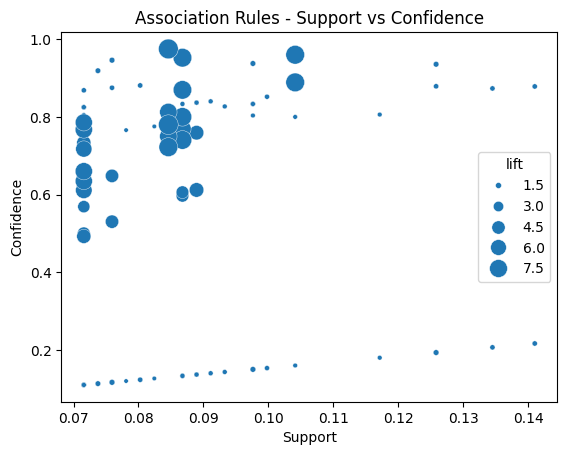

In [7]:
# Visualize the rules
sns.scatterplot(x='support', y='confidence', data=rules, size='lift', sizes=(10, 200))
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()
